### Content

There are 7668 movies in the dataset (the movies released between 1980-2020).

Each movie has the following attributes:

- budget: the budget of a movie.(missing value completed by mean)


- company: the production company (missing values completed by proportion using random number)


- country: country of origin (missing values completed by proportion using random number)


- director: the director (missing values completed by web research)


- genre: main genre of the movie.


- gross: revenue of the movie (missing value completed by mean)


- name: name of the movie


- rating: rating of the movie (R, PG, etc.)


- released: release date + country of release


- runtime: duration of the movie (missing value completed by mean)


- score: IMDb user rating (missing value completed by mean)


- votes: number of user votes (missing value completed by mean)


- star: main actor/actress (missing values completed by web research)


- writer: writer of the movie (missing values completed by web research)


- year: year of release in country of origin 

Acknowledgements:

This data was scraped from Kaggle

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import random

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [488]:
# Read data
df = pd.read_csv(r'movies.csv')

# Data Sensing

In [489]:
# Get a sense of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [491]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,7668,7512,Venom,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7591,12,R,3697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,7668,19,Comedy,2245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,7668,NaN,NaN,NaN,2000.41,11.1535,1980,1991,2000,2010,2020
released,7666,3414,"October 4, 1991 (United States)",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,7665,NaN,NaN,NaN,6.39041,0.968842,1.9,5.8,6.5,7.1,9.3
votes,7665,NaN,NaN,NaN,88108.5,163324,7,9100,33000,93000,2.4e+06
director,7668,2949,Woody Allen,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,7665,4535,Woody Allen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,7667,2814,Nicolas Cage,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
# convert to NaN 
for c in df.columns:
    df[c] = df[c].replace(["", None], np.nan)

In [493]:
# Look for missing values per column
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

- budget column is missing ~ 30% of the values --> we shall use mean to complete missing values, but taking into account the amount sparsity of the data
- score and votes will be completed using the mean of the column
- we shall understand the difference between 'released' to 'year' and 'country'
- runtime, released, writer, star and country will be completed baased on information from web

# Pre-Processing

In [494]:
df['score'] = df['score'].fillna(df['score'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())
df['budget'] = df['budget'].fillna(df['budget'].mean())
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [495]:
null_runtime = df[df['runtime'].isnull()]
null_writer = df[df['writer'].isnull()]
null_star = df[df['star'].isnull()]
print(null_runtime['name'])
print('------------')
print(null_writer['name'])
print('------------')
print(null_star['name'])

5728    Saw: The Final Chapter
5730               The Wolfman
6195         One for the Money
7665             Saving Mbango
Name: name, dtype: object
------------
1820               The Garden
5834                 The Trip
7655    Legend of Deification
Name: name, dtype: object
------------
474    The Business of Show Business
Name: name, dtype: object


In [496]:
# I used IMDB to get this data and manualy edited
df['runtime'][5728] = 90
df['runtime'][5730] = 103
df['runtime'][6195] = 91
df['runtime'][7665] = 110
df['writer'][1820] = 'Derek Jarman'
df['writer'][5834] = 'Rob Brydon'
df['writer'][7655] = 'Jiang Ziya'
df['star'][474] = 'Tom Logan'
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       0
star         0
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [497]:
# fill missing ratings using proportion
proportions = df['rating'].value_counts(normalize=True)
# Replace null values with appropriate values based on proportions
null_indices = df[df['rating'].isnull()].index
replacement_values = proportions.index.to_list()
replacement_probabilities = proportions.to_list()


for index in null_indices:
    replacement_value = random.choices(replacement_values, replacement_probabilities)[0]
    df.at[index, 'rating'] = replacement_value
df.isnull().sum()

name         0
rating       0
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       0
star         0
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [498]:
# fill missing companies using proportion
proportions = df['company'].value_counts(normalize=True)
# Replace null values with appropriate values based on proportions
null_indices = df[df['company'].isnull()].index
replacement_values = proportions.index.to_list()
replacement_probabilities = proportions.to_list()

import random

for index in null_indices:
    replacement_value = random.choices(replacement_values, replacement_probabilities)[0]
    df.at[index, 'company'] = replacement_value
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    2
score       0
votes       0
director    0
writer      0
star        0
country     3
budget      0
gross       0
company     0
runtime     0
dtype: int64

### convert 'released' to useful columns

In [499]:
# The Released column doesn't help at the moment so we'll break it down into three new columns - 'year_rel', 'month_rel' and 'country_rel'
l = df['released'].astype(str)
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
y = []
m = []
c = []
cnt = 0
for s in l:
    if cnt > len(m):
        m.append(np.nan)
    cnt+=1
    splitted = s.split(' ')
    for i in range(len(splitted)):
        if splitted[i][0] == '(':
            if splitted[i][-1] != ')':
                c.append(splitted[i][1:]+ ' ' +splitted[i+1][:-1])
            else:
                c.append(splitted[i][1:-1])
        elif splitted[i].isdigit():
            y.append(int(splitted[i]))
        elif splitted[i] in months:
            m.append(splitted[i])
        elif splitted[i] == 'nan':
            y.append(np.nan)
            m.append(np.nan)
            c.append(np.nan)
df['year_rel'] = y
df['month_rel'] = m
df['country_rel'] = c

# fill missing months using proportion
prop_m = df['month_rel'].value_counts(normalize=True)
prop_c = df['country'].value_counts(normalize=True)

# Replace null values with appropriate values based on proportions
null_indices_m = df[df['month_rel'].isnull()].index
replacement_values_m = prop_m.index.to_list()
replacement_probabilities_m = prop_m.to_list()

for index in null_indices_m:
    replacement_values= random.choices(replacement_values_m, replacement_probabilities_m)[0]
    df.at[index, 'month_rel'] = replacement_values

null_indices_c = df[df['country'].isnull()].index
replacement_values_c = prop_c.index.to_list()
replacement_probabilities_c = prop_c.to_list()

for index in null_indices_c:
    replacement_value = random.choices(replacement_values_c, replacement_probabilities_c)[0]
    df.at[index, 'country'] = replacement_value

df['country_rel'].fillna(df['country'], inplace=True)
df['year_rel'].fillna(df['year'], inplace=True)
df.drop('released', axis=1, inplace=True)
df.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget         0
gross          0
company        0
runtime        0
year_rel       0
month_rel      0
country_rel    0
dtype: int64

### Understanding differences between 'year_rel' and 'country_rel' to 'year' and 'country'

In [500]:
# selected columns
selected_columns = ['name', 'country_rel', 'year_rel','country', 'year']

# Filter rows with differences between columns 'a' and 'b'
different_values_rows = df[(df['country_rel'] != df['country']) & (df['year_rel'] != df['year'])]

# Print selected columns for the filtered rows
print(different_values_rows[selected_columns][:10])

                       name    country_rel  year_rel        country  year
11   The Gods Must Be Crazy  United States    1984.0   South Africa  1980
49       Lion of the Desert          Japan    1981.0          Libya  1980
54            City of Women  United States    1981.0          Italy  1980
59                Hangar 18        Ireland    1981.0  United States  1980
62             It's My Turn      Argentina    1981.0  United States  1980
79               Windwalker         Sweden    1983.0  United States  1980
86    La Cage aux Folles II  United States    1981.0         France  1980
91      Mantis Fist Fighter  United States    1982.0      Hong Kong  1980
97                  Porky's  United States    1982.0         Canada  1981
101               Mad Max 2  United States    1982.0      Australia  1981


#### Quick search indicates that the 'released' specified the release date in specific country which not always the same as the one in 'country' column

In [501]:
# check median in the following columns to understand if decimal value can be ignored
median_gross = df['gross'].median()
median_budget = df['budget'].median()
median_votes = df['votes'].median()
print(f'the median gross is {median_gross}, the median budget is {median_budget}, the median votes are {median_votes}')

the median gross is 21413303.5, the median budget is 35589876.192650534, the median votes are 33000.0


In [502]:
# check decimal weight in runtime column
decimal_parts = df['runtime'].apply(lambda x: x - int(x) if pd.notna(x) else 0)  # Extract decimal parts
sum_of_decimal_parts = decimal_parts.sum()
print(sum_of_decimal_parts)

0.0


### the gross, budget and votes can be integers - the impact of the decimal value is minor 

In [503]:
# Change gross, budget and votes types to int
cols_to_convert = ['gross', 'budget', 'votes', 'year_rel', 'runtime']
for c in cols_to_convert:
    df[c] = df[c].astype('int64')
df.dtypes

name            object
rating          object
genre           object
year             int64
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
year_rel         int64
month_rel       object
country_rel     object
dtype: object

In [504]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_rel,month_rel,country_rel
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,June,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,July,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,June,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,July,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,July,United States


In [505]:
# Change object types to str
cols_to_convert = ['name', 'rating', 'genre', 'director', 'writer', 'star', 'country', 'company', 'month_rel', 'country_rel']
for c in cols_to_convert:
    df[c] = df[c].astype(str)
df.dtypes

name            object
rating          object
genre           object
year             int64
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
year_rel         int64
month_rel       object
country_rel     object
dtype: object

In [506]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_rel,month_rel,country_rel
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,December,United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,April,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,December,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,December,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,April,United States


### Drop any duplicates - visual comparison + web searching about changes that might be a mistake

In [507]:
# find any distinct company 
unique_companies = df['company'].drop_duplicates().sort_values(ascending=False).head(10)
print(unique_companies)

7129                        thefyzz
5664                    micro_scope
6412       iDeal Partners Film Fund
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
524       Zupnik-Curtis Enterprises
3330    Zucker Brothers Productions
520                Zoetrope Studios
Name: company, dtype: object


In [508]:
# find any distinct genre
df['genre'].drop_duplicates().sort_values(ascending = False)

2382      Western
4675     Thriller
7600        Sport
5876       Sci-Fi
5905      Romance
4858      Mystery
7617      Musical
162         Music
7046       Horror
474       History
3468      Fantasy
7072       Family
3045        Drama
7450        Crime
5251       Comedy
7246    Biography
7480    Animation
5845    Adventure
5445       Action
Name: genre, dtype: object

#### In both cases did not find duplications of data

# Data Visualization

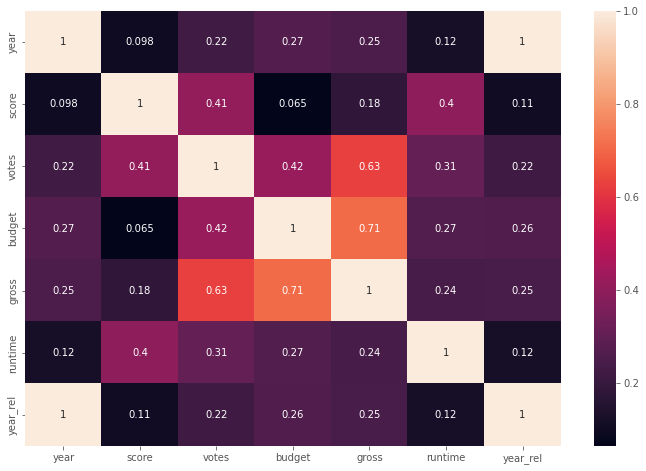

In [509]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

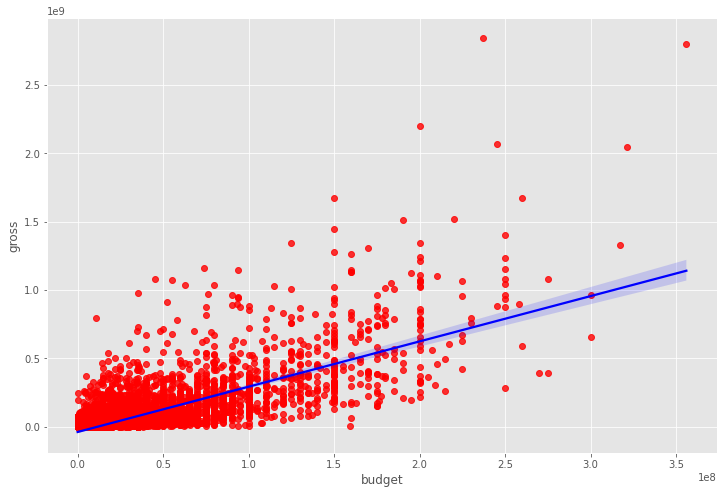

In [510]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [511]:
df_cat = df
for c in df_cat.columns:
    if df_cat[c].dtype == 'object':
        df_cat[c] = df_cat[c].astype('category')
        df_cat[c] =df_cat[c].cat.codes
df_cat.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_rel,month_rel,country_rel
5445,533,5,0,2009,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,2009,2,56
7445,535,5,0,2019,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,2019,0,56
3045,6896,5,6,1997,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,1997,2,56
6663,5144,5,0,2015,7.8,876000,1125,2551,524,55,245000000,2069521700,1540,138,2015,2,56
7244,536,5,0,2018,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,2018,0,56


In [512]:
correlation_matrix = df_cat.corr()

# Iterate through the correlation matrix and print high correlations
threshold = 0.5
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            print(f"Correlation between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]}")

Correlation between year and year_rel: 0.9974156535221845
Correlation between votes and gross: 0.6287131745156956
Correlation between budget and gross: 0.7112703466796709


# Conclusions

- Our analysis highlights a robust positive correlation between film budget and gross revenue.
- Similarly, we identify a significant link between the number of votes a film garners and its gross revenue.
- These findings emphasize the pivotal role of budget and audience engagement in shaping a film's financial success.